<a href="https://colab.research.google.com/github/tasanyphy01773/ClimateScience/blob/main/CHIRPS_Precipitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#run and then restart runtime this cell when runtime crashes.
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

In [1]:
#writing some conda package or module

%matplotlib inline
import warnings
import dask

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#PC loc
# path = '/media/tasanyphy/Documents/Project or Research work/Climate Change/climate_physics[omi_tuaha]/Tanvir_sir_data/all_data/'
# file = 'APHRO_MA_025deg_V1101.PRE.1951.nc'

# Drive loc
file = '/content/drive/MyDrive/Research Project/Climate Science/Climate_physics/CHIRPS_daily_1981_2020.nc'

ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:  (year: 39, month: 12, day: 31, lat: 140, lon: 140)
Coordinates:
  * year     (year) float32 1.981e+03 1.982e+03 ... 2.018e+03 2.019e+03
  * month    (month) int32 0 1 2 3 4 5 6 7 8 9 10 11
  * day      (day) int32 0 1 2 3 4 5 6 7 8 9 ... 21 22 23 24 25 26 27 28 29 30
  * lat      (lat) float32 20.02 20.07 20.12 20.17 ... 26.83 26.88 26.93 26.98
  * lon      (lon) float32 87.02 87.07 87.12 87.17 ... 93.83 93.88 93.93 93.98
Data variables:
    pr       (year, month, day, lat, lon) float32 ...

In [3]:
ds['month']

<xarray.DataArray 'month' (month: 12)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)
Coordinates:
  * month    (month) int32 0 1 2 3 4 5 6 7 8 9 10 11

In [4]:
# selecting variable for lat lon and time 
lon = ds['lon'][:]
lat = ds['lat'][:] 


#converting lon lat in lon2d and lat2d
lon2d, lat2d = np.meshgrid(lon, lat)

In [5]:
#separating the season 
#pre-monsoon: mam
#monsoon: jjas
#post-monsoon: on
#dry: djf
#month starts from 0


def is_mam(month):
  return (month>=2) & (month<=4)

def is_jjas(month):
  return (month>=5) & (month<=8)
  
def is_on(month):
  return (month>=9) & (month<=10)

def is_djf(month):
  return ((month>=11) + (month<=1)) 


In [ ]:
jjas_ds = ds.sel(month = is_jjas(ds['month']))
jjas_mean = jjas_ds.mean(dim='year').mean(dim='month')
jjas_mean = jjas_mean.sum(dim='day')
jjas_mean

<xarray.Dataset>
Dimensions:  (lat: 140, lon: 140)
Coordinates:
  * lat      (lat) float32 20.02 20.07 20.12 20.17 ... 26.83 26.88 26.93 26.98
  * lon      (lon) float32 87.02 87.07 87.12 87.17 ... 93.83 93.88 93.93 93.98
Data variables:
    pr       (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 410.6 419.8 436.0 448.1

In [10]:
djf_ds = ds.sel(month = is_djf(ds['month']))
jjas_ds = ds.sel(month = is_jjas(ds['month']))
on_ds = ds.sel(month = is_on(ds['month']))
mam_ds = ds.sel(month = is_mam(ds['month']))


# djf_mean = djf_ds.mean(dim='year').mean(dim='month').sum(dim='day')
# jjas_mean = jjas_ds.mean(dim='year').mean(dim='month').sum(dim='day')
# on_mean = on_ds.mean(dim='year').mean(dim='month').sum(dim='day')
# mam_mean=mam_ds.mean(dim='year').mean(dim='month').sum(dim='day')

djf_mean = djf_ds.mean(dim='year').sum(dim='month').sum(dim='day')
jjas_mean = jjas_ds.mean(dim='year').sum(dim='month').sum(dim='day')
on_mean = on_ds.mean(dim='year').sum(dim='month').sum(dim='day')
mam_mean=mam_ds.mean(dim='year').sum(dim='month').sum(dim='day')

In [11]:
jjas_mean.pr.values

array([[   0.    ,    0.    ,    0.    , ..., 2756.778 , 2683.5483,
        2584.7097],
       [   0.    ,    0.    ,    0.    , ..., 2683.12  , 2613.047 ,
        2516.6033],
       [   0.    ,    0.    ,    0.    , ..., 2572.3362, 2499.4521,
        2379.5447],
       ...,
       [1420.5557, 1494.4537, 1485.8203, ..., 1556.2283, 1607.4265,
        1643.738 ],
       [1328.3741, 1265.1766, 1052.589 , ..., 1595.8367, 1654.8551,
        1695.3197],
       [1225.5673, 1172.9747, 1088.679 , ..., 1660.1648, 1725.2279,
        1772.3497]], dtype=float32)

Text(0.5, 0.97, 'Seasonal distribution of precipitation (mm)')

/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: Download

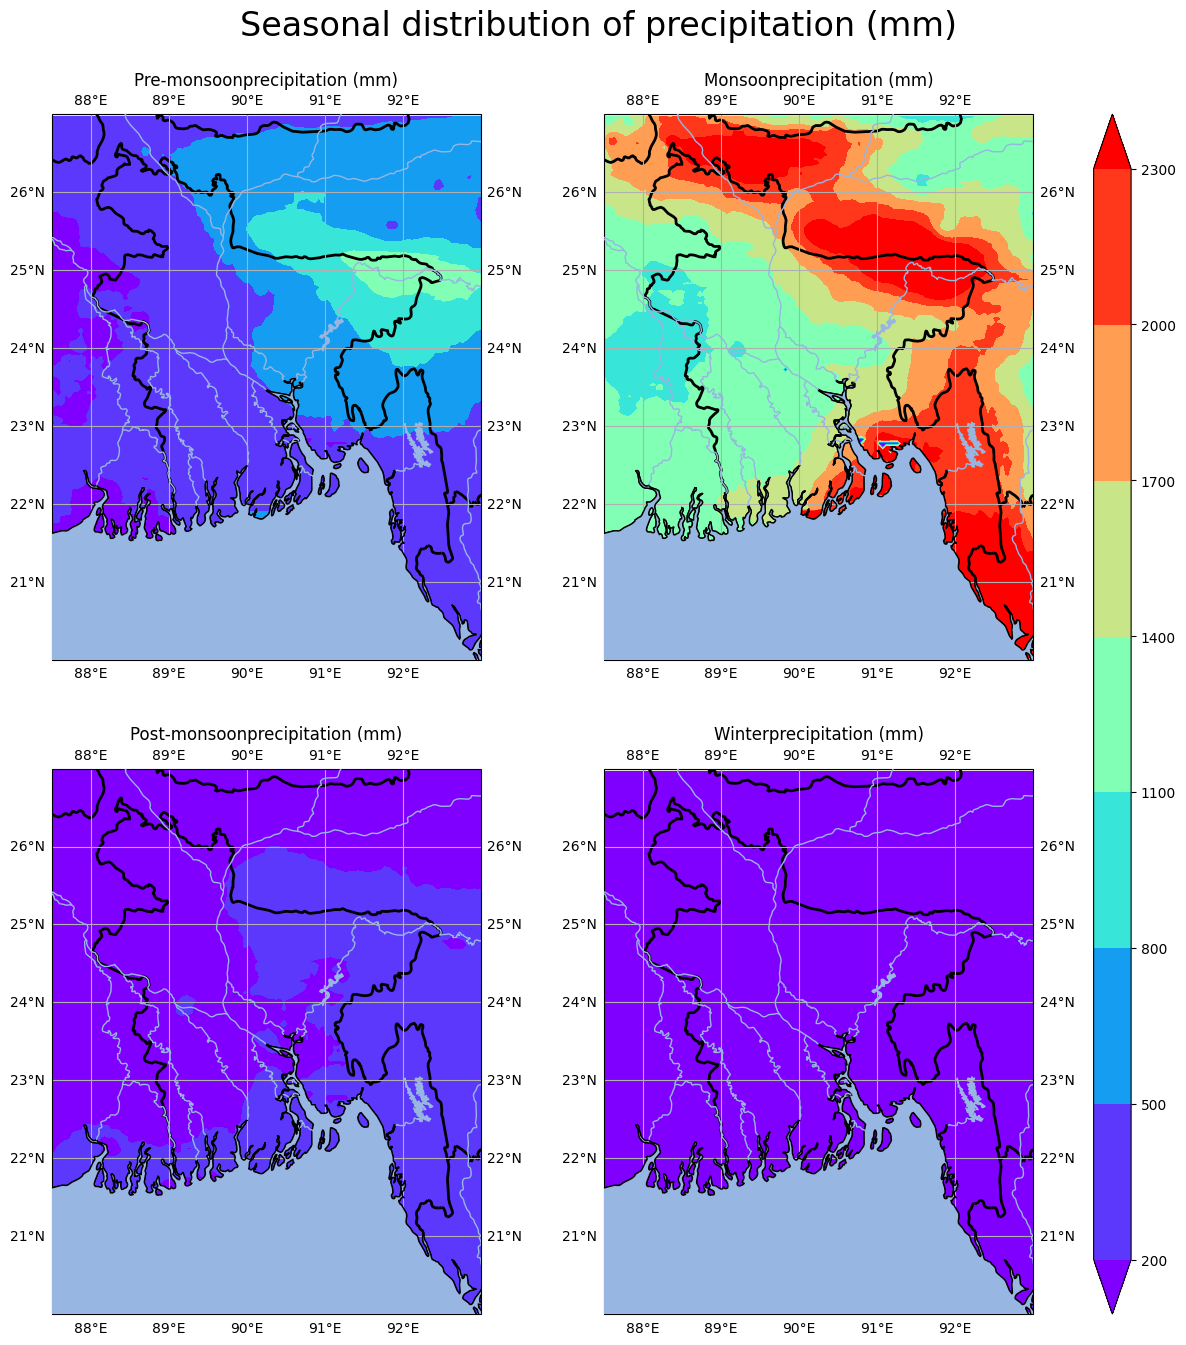

In [12]:
levels = np.arange(200, 2500, 300)
fig = plt.figure(figsize=(15, 15), dpi=100)

seasons_mean = [mam_mean, jjas_mean, on_mean, djf_mean]
seasons_name = ['Pre-monsoon','Monsoon', 'Post-monsoon', 'Winter']

for i in range(1, 5):
  ax = plt.subplot(2,2,i, projection=ccrs.PlateCarree())
  plt.contourf(lon2d, lat2d, seasons_mean[i-1]['pr'], cmap='rainbow', levels=levels, extend='both', transform = ccrs.PlateCarree())
  # plt.contourf(lon2d, lat2d, seasons_mean[i-1]['pr'], cmap='rainbow',extend='both', transform = ccrs.PlateCarree())
  ax.coastlines()
  ax.add_feature(cf.BORDERS, linewidth=2)
  ax.add_feature(cf.OCEAN, zorder=100, edgecolor='k')
  ax.add_feature(cf.LAKES)
  ax.add_feature(cf.LAND)
  ax.add_feature(cf.RIVERS, zorder=100)

  ax.set_extent([87.5, 93, 20, 27]) 
  ax.gridlines(draw_labels=True)
  plt.title( seasons_name[i-1] +'precipitation (mm)')

#colorbar_setting
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.83, 0.1, 0.025, 0.8]) #plt.axes([x_position,y_position,width,height])
plt.colorbar(cax=cax)

# Suptitle
plt.suptitle("Seasonal distribution of precipitation (mm)", 
             fontsize=24, y=0.97)

# plt.savefig('/content/drive/MyDrive/Research Project/Climate Science/Climate_physics/Climate_physics/sany_std/Seasonal_distribution.png')

In [13]:
# monthly mean
def select_month_data(month):
  m = ds.sel(month=month)
  monthly_mean = m.mean(dim='year').sum(dim='day') 
  return monthly_mean

In [ ]:
select_month_data(5)

<xarray.Dataset>
Dimensions:  (lat: 140, lon: 140)
Coordinates:
    month    int32 5
  * lat      (lat) float32 20.02 20.07 20.12 20.17 ... 26.83 26.88 26.93 26.98
  * lon      (lon) float32 87.02 87.07 87.12 87.17 ... 93.83 93.88 93.93 93.98
Data variables:
    pr       (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 441.4 448.2 465.2 472.2

In [14]:
j = select_month_data(0)
f = select_month_data(1)
mr = select_month_data(2)
a = select_month_data(3)
m = select_month_data(4)
ju = select_month_data(5)
jl = select_month_data(6)
ag = select_month_data(7)
s = select_month_data(8)
o = select_month_data(9)
n = select_month_data(10)
d = select_month_data(11)

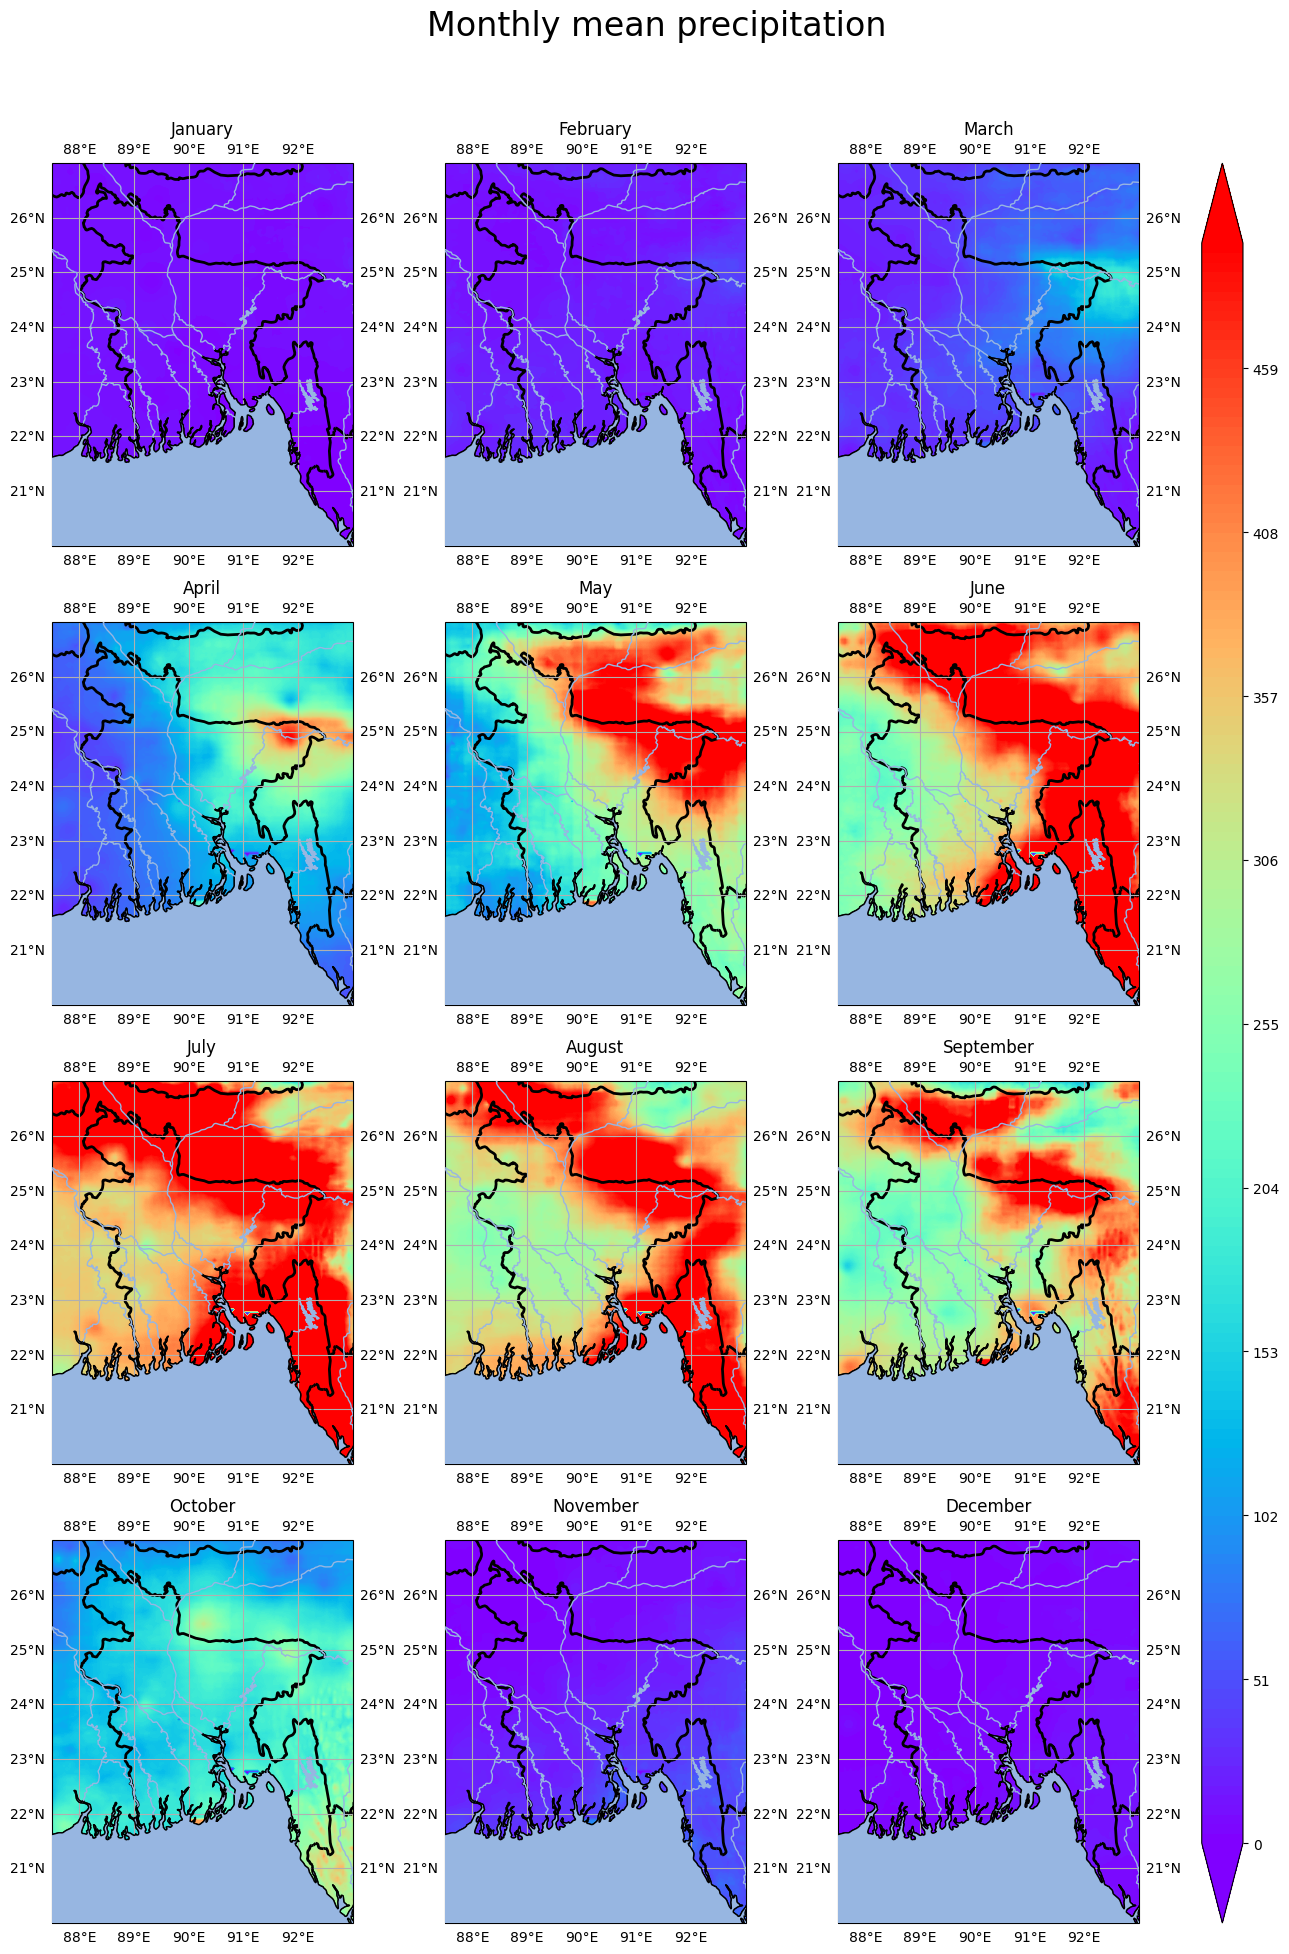

In [ ]:
levels = np.arange(0, 500, 3)
fig = plt.figure(figsize=(16.5, 22), dpi=100)

monthly_mean = [j,f,mr,a,m,ju,jl,ag,s,o,n,d]
month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i in range(1, 13):
  ax = plt.subplot(4,3,i, projection=ccrs.PlateCarree())
  plt.contourf(lon2d, lat2d, monthly_mean[i-1]['pr'], cmap='rainbow', levels=levels,  extend='both', transform = ccrs.PlateCarree())
  ax.coastlines()
  ax.add_feature(cf.BORDERS, linewidth=2)
  ax.add_feature(cf.OCEAN, zorder=100, edgecolor='k')
  ax.add_feature(cf.LAKES)
  ax.add_feature(cf.LAND)
  ax.add_feature(cf.RIVERS, zorder=100)

  ax.set_extent([87.5, 93, 20, 27]) 
  ax.gridlines(draw_labels=True)
  plt.title(month_name[i-1])

#colorbar_setting
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.83, 0.1, 0.025, 0.8]) #plt.axes([x_position,y_position,width,height])
plt.colorbar(cax=cax)

# Suptitle
plt.suptitle("Monthly mean precipitation", 
             fontsize=24, y=0.97)

# plt.savefig('/content/drive/MyDrive/Research Project/Climate Science/Climate_physics/Climate_physics/sany_std/Monthly_distribution.png')

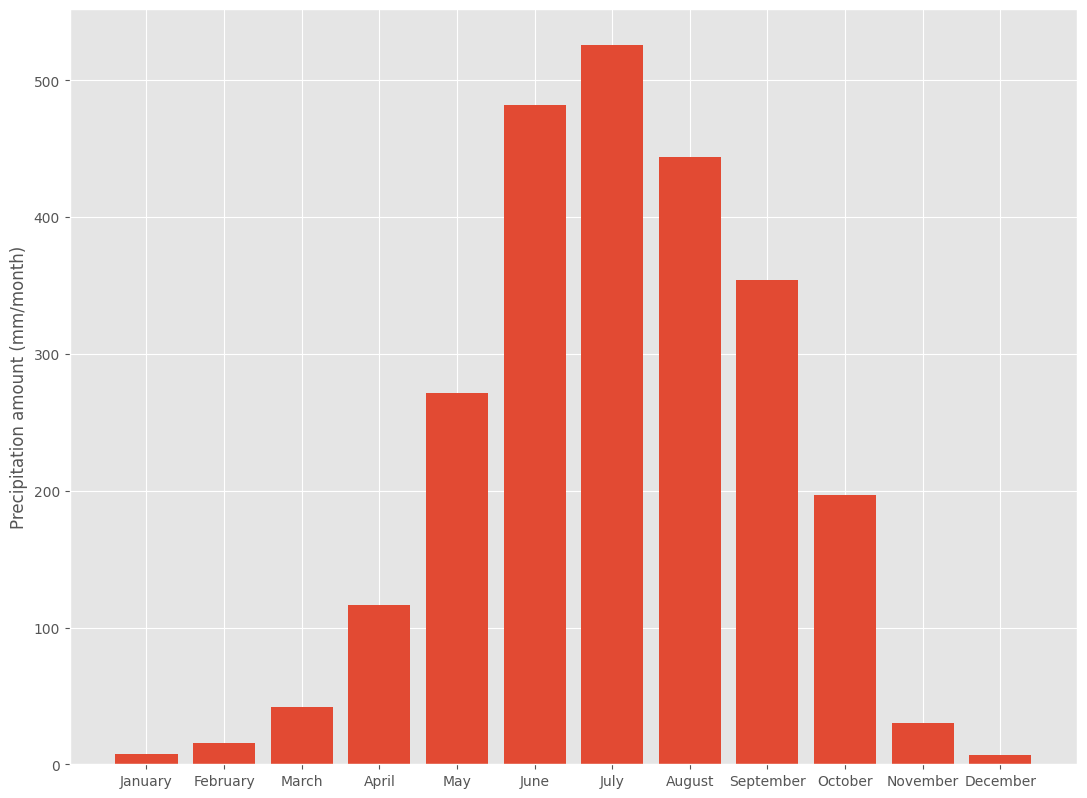

In [ ]:
month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = ds.mean(dim='lon').mean(dim='lat').mean('year').sum('day')
precipitation = monthly_data.pr.values


with plt.style.context('ggplot'):
  plt.figure(figsize=(13, 10), dpi=100)
  plt.bar(month_name,precipitation)
  plt.ylabel('Precipitation amount (mm/month)')
  # plt.savefig('/content/drive/MyDrive/Research Project/Climate Science/Climate_physics/Climate_physics/sany_std/Monthly_temporal_distribution.png')

In [6]:
djf_ds = ds.sel(month = is_djf(ds['month']))
jjas_ds = ds.sel(month = is_jjas(ds['month']))
on_ds = ds.sel(month = is_on(ds['month']))
mam_ds = ds.sel(month = is_mam(ds['month']))

In [15]:
monthly_mean = [j,f,mr,a,m,ju,jl,ag,s,o,n,d]
month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [67]:
pre_monsoon = (mr+a+m).mean(dim='lon').mean(dim='lat').pr.values
monsoon =(ju+jl+ag+s).mean(dim='lon').mean(dim='lat').pr.values
post_monsoon = (o+n).mean(dim='lon').mean(dim='lat').pr.values
winter = (d+j+f).mean(dim='lon').mean(dim='lat').pr.values

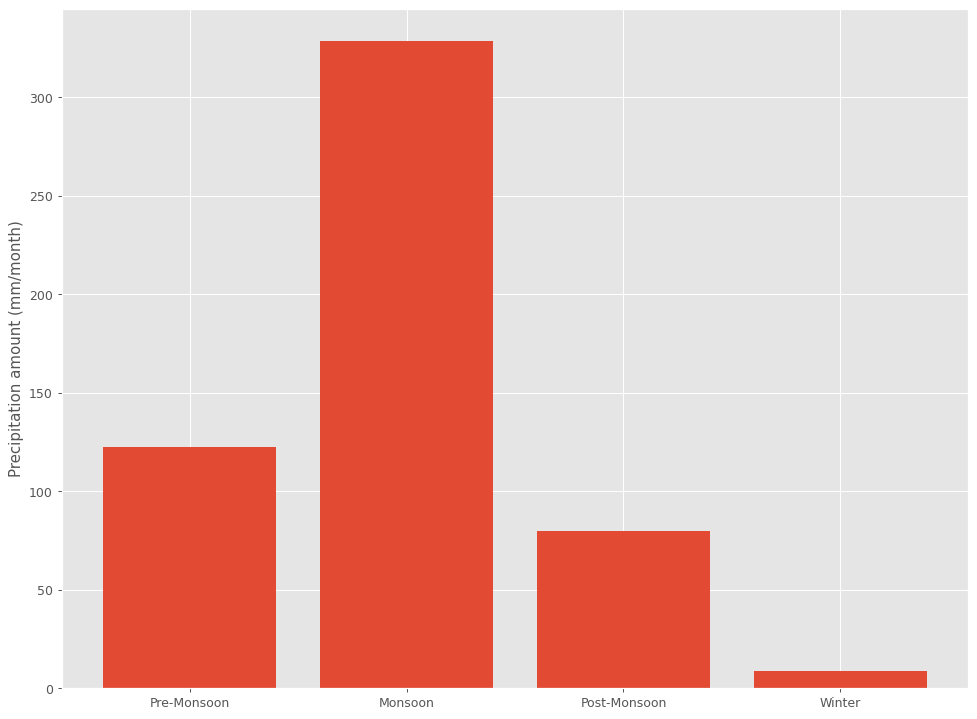

In [75]:
season_name = ['Pre-Monsoon', 'Monsoon', 'Post-Monsoon', 'Winter']
seasonal_prec = [float(pre_monsoon)/3, float(monsoon)/4, float(post_monsoon)/2, float(winter)/3]


with plt.style.context('ggplot'):
  plt.figure(figsize=(13, 10), dpi=90)
  plt.bar(season_name,seasonal_prec)
  plt.ylabel('Precipitation amount (mm/month)')
  plt.savefig('/content/drive/MyDrive/Research Project/Climate Science/Climate_physics/Climate_physics/sany_std/seasonal_temporal_distribution.png')